# Pymaceuticals Inc.
---

### Analysis

- Capomulin and Ramicane seem to be more effective at shrinking tumors.
- The provided data has almost equal representation between genders, with males tested being slightly higher at 51%. This should help minimize gender as a factor in how effective the drugs are, though further analysis could prove otherwise.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame  #USE THIS IN REMAINING STEPS
Combined_data = pd.merge(mouse_metadata, study_results, how='right')

# Display the data table for preview
Combined_data = Combined_data[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 
                               'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']]

Combined_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice=Combined_data["Mouse ID"].value_counts()
number_of_mice=len(mice)
number_of_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint  # .unique
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. #duplicate mice
duplicate_mice = Combined_data.loc[Combined_data.duplicated(subset=['Mouse ID','Timepoint',]),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [ ]:
# Optional: Get all the data for the duplicate mouse ID. 

##circle back to this later


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.  #Mouse ID
clean_df = Combined_data[Combined_data['Mouse ID'].isin(duplicate_mice) == False]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
# Checking the number of mice in the clean DataFrame. ##same code as last count
clean_mice=clean_df["Mouse ID"].value_counts()
clean_number_of_mice=len(clean_mice)
clean_number_of_mice

248

## Summary Statistics

In [9]:
##working out error "TypeError: agg function failed [how->mean,dtype->object]"

#print(clean_df['Drug Regimen'].dtype)

#clean_df['Drug Regimen'] = clean_df['Drug Regimen'].astype('category')

#print(clean_df["Tumor Volume (mm3)"].apply(lambda x: isinstance(x, (int, float))).all())

#print(clean_df.dtypes)
#print(clean_df.head())

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
##regimen_mean, etc
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
##clean_df.groupby()  .mean()[]
# Assemble the resulting series into a single summary DataFrame.


regimen_mean = clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean()
regimen_median = clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].median()
regimen_variance = clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].var()
regimen_std = clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].std()
regimen_sem = clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].sem()

summary_stats_table = pd.DataFrame({"Mean Tumor Volume": regimen_mean, 
                                    "Median Tumor Volume":regimen_median, 
                                    "Tumor Volume Variance":regimen_variance, 
                                    "Tumor Volume Std. Dev.": regimen_std, 
                                    "Tumor Volume Std. Err.": regimen_sem})

summary_stats_table


/var/folders/hn/bb15mw9176x6rlr8m8h0wss00000gn/T/ipykernel_69997/893776277.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  regimen_mean = clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean()
/var/folders/hn/bb15mw9176x6rlr8m8h0wss00000gn/T/ipykernel_69997/893776277.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  regimen_median = clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].median()
/var/folders/hn/bb15mw9176x6rlr8m8h0wss00000gn/T/ipykernel_69997/893776277.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pas

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
## .agg() for aggregation

summary_agg =  clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg


/var/folders/hn/bb15mw9176x6rlr8m8h0wss00000gn/T/ipykernel_69997/677905728.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_agg =  clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

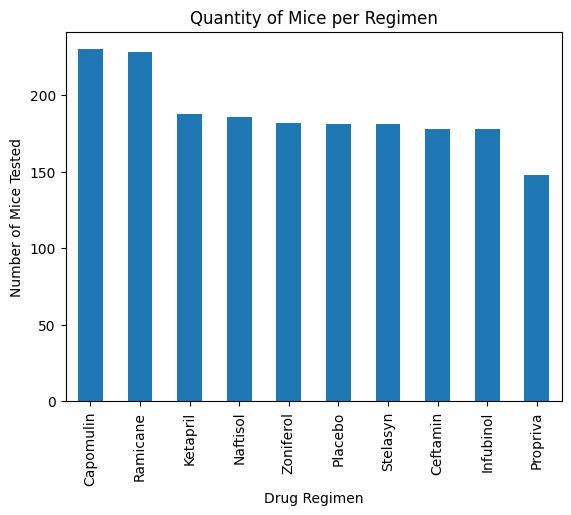

In [16]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_qty = clean_df["Drug Regimen"].value_counts()

bar_plot = mice_qty.plot.bar(color='tab:blue')

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Quantity of Mice per Regimen")

plt.show()

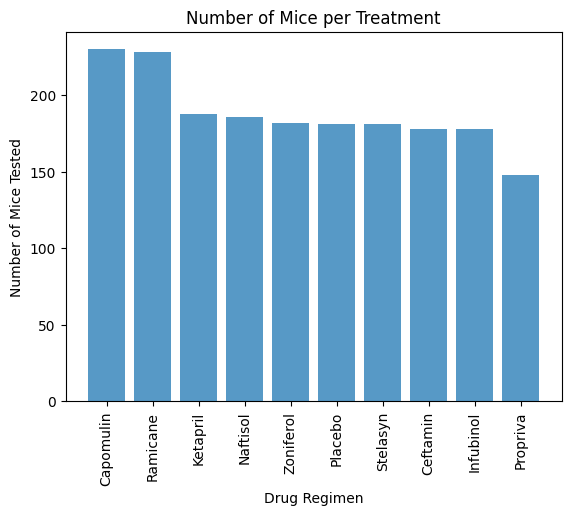

In [20]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

x_axis = mice_qty.index.values
y_axis = mice_qty.values

plt.bar(x_axis,y_axis, color='tab:blue', alpha=0.75, align='center')

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation="vertical")
plt.title("Number of Mice per Treatment")

plt.show()

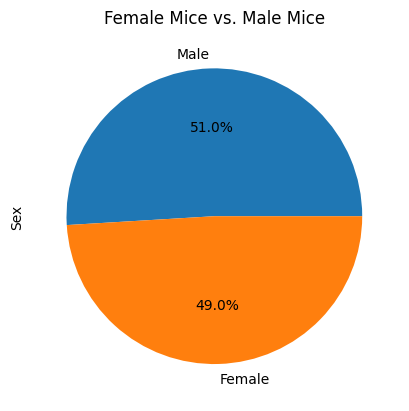

In [22]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_data = clean_df["Sex"].value_counts()

# Make the pie chart
gender_data.plot.pie(autopct= "%1.1f%%")
plt.title("Female Mice vs. Male Mice")
plt.ylabel('Sex')
plt.show()

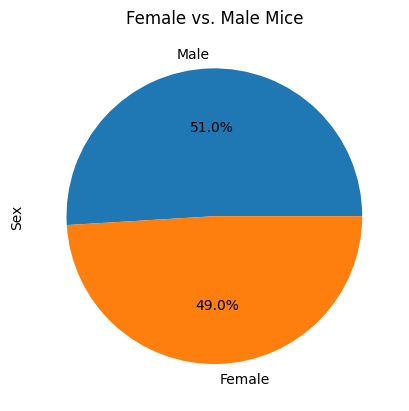

In [23]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
labels = ['Female', 'Male']
sizes = [49.7999197, 50.200803]

# Make the pie chart
plot = gender_data.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.ylabel('Sex')
plt.title("Female vs. Male Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


by_mouse = Combined_data.groupby(["Mouse ID"]).max()
by_mouse_reset = by_mouse.reset_index()

merged_data = by_mouse_reset[['Mouse ID','Timepoint']].\
    merge(Combined_data,on=['Mouse ID','Timepoint'],how="left")

def get_outliers(regimen):
    regimen_data = merged_data.loc[merged_data["Drug Regimen"] == regimen]['Tumor Volume (mm3)']
    
    quartiles = regimen_data.quantile([.25,.5,.75])
    quart_first = quartiles[0.25]
    quart_last = quartiles[0.75]
    quart_range = quart_last - quart_first
    lower_bound = quart_first - (1.5 * quart_range)
    upper_bound = quart_last + (1.5 * quart_range)

    outliers = regimen_data.loc[(regimen_data < lower_bound) | (regimen_data > upper_bound)]
    print(f"{regimen}'s potential outliers:{outliers}")
    return regimen_data
    
cap = get_outliers("Capomulin")
ram = get_outliers("Ramicane")
inf = get_outliers("Infubinol")
ceft = get_outliers("Ceftamin")

Capomulin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


In [28]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers.

    # Locate the rows which contain mice on each drug and get the tumor volumes

    # add subset

    # Determine outliers using upper and lower bounds


drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugs = Combined_data[Combined_data["Drug Regimen"].isin(drug_list)]
drugs.head()

last_timepoint = drugs.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))

last_timepoint = last_timepoint.stack(level=0).unstack(level=0)

treatment = 0
for drug in drug_list:
    quartiles = last_timepoint[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)


    if treatment == 0:
        print(f"------------------------------------------------------------")
    print(f"The lower quartile for {drug} treatments is: {lowerq}")
    print(f"The upper quartile for {drug} treatments is: {upperq}")
    print(f"The interquartile range for {drug} treatments is: {iqr}")
    print(f"Values below {lower_bound} could be {drug} outliers.")
    print(f"Values above {upper_bound} could be {drug} outliers.")
    print(f"------------------------------------------------------------")
    treatment+=1

------------------------------------------------------------
The lower quartile for Capomulin treatments is: 32.38
The upper quartile for Capomulin treatments is: 40.16
The interquartile range for Capomulin treatments is: 7.78
Values below 20.71 could be Capomulin outliers.
Values above 51.83 could be Capomulin outliers.
------------------------------------------------------------
The lower quartile for Ramicane treatments is: 31.56
The upper quartile for Ramicane treatments is: 40.66
The interquartile range for Ramicane treatments is: 9.1
Values below 17.91 could be Ramicane outliers.
Values above 54.31 could be Ramicane outliers.
------------------------------------------------------------
The lower quartile for Infubinol treatments is: 54.05
The upper quartile for Infubinol treatments is: 65.53
The interquartile range for Infubinol treatments is: 11.48
Values below 36.83 could be Infubinol outliers.
Values above 82.75 could be Infubinol outliers.
------------------------------------

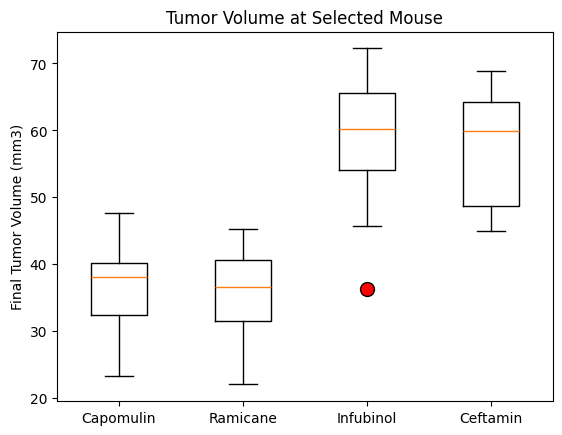

In [31]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
red_dot = dict(markerfacecolor = "red", markersize=10)
plt.boxplot([cap, ram, inf, ceft],tick_labels=['Capomulin','Ramicane','Infubinol','Ceftamin'],flierprops= red_dot)
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Tumor Volume at Selected Mouse')


plt.show()

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


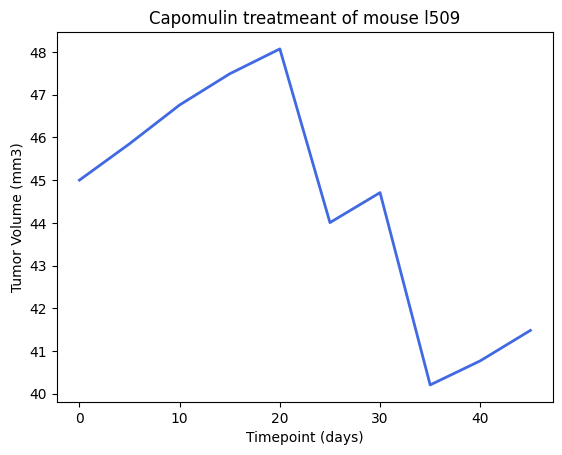

In [42]:
Capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]

forline_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]
forline_df.head()
x_axis = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, tumsiz,linewidth=2,color="royalblue", label="Fahreneit")
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

/var/folders/hn/bb15mw9176x6rlr8m8h0wss00000gn/T/ipykernel_69997/2408201903.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Capomulin_df['Weight (g)'] = pd.to_numeric(Capomulin_df['Weight (g)'], errors='coerce')
/var/folders/hn/bb15mw9176x6rlr8m8h0wss00000gn/T/ipykernel_69997/2408201903.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Capomulin_df['Tumor Volume (mm3)'] = pd.to_numeric(Capomulin_df['Tumor Volume (mm3)'], errors='coerce')


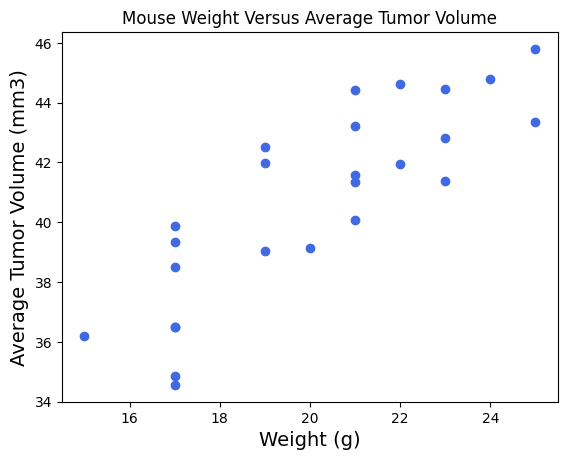

In [43]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
##throws errors but displays correctly?

# Ensure numeric types
Capomulin_df['Weight (g)'] = pd.to_numeric(Capomulin_df['Weight (g)'], errors='coerce')
Capomulin_df['Tumor Volume (mm3)'] = pd.to_numeric(Capomulin_df['Tumor Volume (mm3)'], errors='coerce')

# Group only numeric columns
avg_capm_vol = Capomulin_df.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()

# Plot
fig1, ax1 = plt.subplots()
marker_size = 15
plt.scatter(avg_capm_vol['Weight (g)'], avg_capm_vol['Tumor Volume (mm3)'], color="royalblue")
plt.xlabel('Weight (g)', fontsize=14)
plt.ylabel('Average Tumor Volume (mm3)', fontsize=14)
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


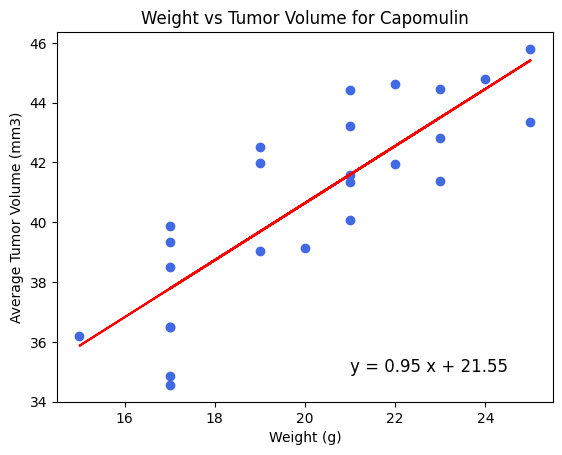

In [49]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation = st.pearsonr(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")

(slope, intercept,rvalue, pvalue, stderr)=st.linregress(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"])
regress_values=avg_capm_vol["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"],color='royalblue')
plt.plot(avg_capm_vol["Weight (g)"], regress_values, color='red')
plt.annotate(line_eq,(21,35), fontsize=12)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()